## **07-08 케라스(Keras) 훑어보기**

이 책에서는 딥 러닝을 쉽게 할 수 있는 파이썬 라이브러리인 케라스(Keras)를 사용합니다. 케라스는 유저가 손쉽게 딥 러닝을 구현할 수 있도록 도와주는 상위 레벨의 인터페이스로 딥 러닝을 쉽게 구현할 수 있도록 해줍니다.

케라스의 모든 기능들을 열거하는 것만으로도 한 권의 책의 분량이므로 여기서 전부 다룰 수는 없습니다. 가장 좋은 방법은 케라스나 텐서플로우 공식 문서( https://keras.io/ or https://www.tensorflow.org/guide/keras?hl=ko )를 참고하는 것입니다. 여기서는 대표적으로 사용되는 케라스의 도구들을 이해합니다.

---
### **1. 전처리(Preprocessing)**
**Tokenizer()** : 토큰화와 정수 인코딩을 위해 사용됩니다. 다음은 훈련 데이터로부터 단어 집합을 생성하고, 해당 단어 집합으로 임의의 문장을 정수 인코딩하는 과정을 보여줍니다.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer  # 영어의 경우 사용
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ", sequences)
print("단어 집합 : ", tokenizer.word_index)


정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


출력 결과를 보면 great는 단어 집합(vocabulary)에 없으므로 출력되지 않습니다.

**pad_sequence()** : 전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있습니다. 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [2]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

* **첫번째 인자** = 패딩을 진행할 데이터  
* **maxlen** = 모든 데이터에 대해서 정규화 할 길이  
* **padding** = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움

---
### **2. 워드 임베딩(Word Embedding)**
워드 임베딩 챕터에서 다루겠지만, 워드 임베딩이란 **텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것** 을 말합니다. 앞서 배운 개념인 원-핫 벡터와 비교해봅시다. 원-핫 벡터는 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터이며 벡터의 차원이 대체적으로 크다는 성질을 가졌습니다.

* Ex) 
```python
    [0 1 0 0 0 0 ... 중략 ... 0 0 0 0 0 0 0] # 차원이 굉장히 크면서 대부분의 값이 0  
```
  
원-핫 벡터는 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점이 있습니다. 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수입니다.

* Ex) 
```python
    [0.1 -1.2 0.8 0.2 1.8] # 상대적으로 저차원이며 실수값을 가짐  
```  
간단히 표로 정리하면 아래와 같습니다.

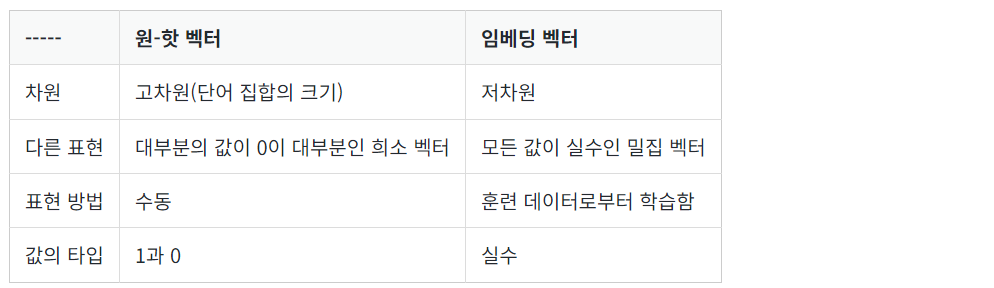

단어를 원-핫 벡터로 만드는 과정을 원-핫 인코딩이라고 한다면, 단어를 밀집 벡터로 만드는 작업을 **워드 임베딩(word embedding)** 이라고 합니다. 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다. 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다. 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.  
  
**Embedding()** : Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

아래의 코드는 실제 동작되는 코드가 아니라 의사 코드(pseudo-code)로 임베딩의 개념 이해를 돕기 위해서 작성되었습니다.

In [ ]:
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4], [5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7     # 원 데이텅의 단어 수 (원핫 벡터의 차원)
embedding_dim = 2  # 임베딩으로 만들 단어벡터의 차원
emb = Embedding(vocab_size, embedding_dim, input_length=5) #input_length : 문장 벡터의 길이


```yaml

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.
```

Embedding()의 대표적인 인자는 다음과 같습니다.

**첫번째 인자** = 단어 집합의 크기. 즉, 총 단어의 개수  
**두번째 인자** = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기  
**input_length** = 입력 시퀀스의 길이  

---
### **3. 모델링(Modeling)**
**Sequential()** : 인공 신경망 챕터에서 입력층, 은닉층, 출력층에 대해서 배웠습니다. 케라스에서는 이러한 층을 구성하기 위해 Sequential()을 사용합니다. Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가합니다. 아래는 model.add()로 층을 추가하는 예제 코드를 보여줍니다. 실제로는 세 개의 온점 대신에 층의 이름을 기재해야 합니다.

````python
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(...) # 층 추가
    model.add(...) # 층 추가
    model.add(...) # 층 추가
````

Embedding()을 통해 생성하는 임베딩 층(embedding layer)을 추가하는 예시를 봅시다.

```python
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim, input_length))

```

위의 코드에서 Dense()는 한번 사용되었지만 더 많은 층을 추가할 수 있습니다. Dense()의 대표적인 인자를 보겠습니다.

**첫번째 인자** = 출력 뉴런의 수.  
**input_dim** = 입력 뉴런의 수. (입력의 차원)  
**activation** = 활성화 함수.  
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.  
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.  
- softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.  
- relu : 은닉층에 주로 사용되는 활성화 함수.  
  
위 코드에서 사용된 Dense()의 의미를 보겠습니다. 첫번째 인자의 값은 1인데 이는 총 1개의 출력 뉴런을 의미합니다. Dense()의 두번째 인자인 input_dim은 입력층의 뉴런 수를 의미합니다. 이 경우에는 3입니다. 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었습니다. 이를 시각화하면 다음과 같습니다.

![image](https://wikidocs.net/images/page/32105/neural_network1_final.PNG)

Dense()를 사용하여 전결합층을 하나 더 추가해보겠습니다.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))  # 은닉층 (Hidden layer)
model.add(Dense(1, activation='sigmoid')) # 출력층


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


이번에는 Dense()가 두 번 사용되었습니다. Dense()가 처음 사용되었을 때와 추가로 사용되었을 때의 인자는 조금 다릅니다. 첫번째 사용된 Dense()의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런입니다. 층이 하나 더 생겼기 때문입니다.

두번째 Dense()는 input_dim 인자가 없는데, 이는 이미 이전 층의 뉴런 수가 8개임을 알고있기 때문입니다. 위 코드에서 두번째 Dense()는 마지막 층이므로, 첫번째 인자 1은 결국 출력층의 뉴런 개수가 됩니다. 이를 시각화하면 다음과 같습니다.

![image](https://wikidocs.net/images/page/32105/neural_network2_final.PNG)

이 외에도 LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있습니다. 일부는 뒤에서 배웁니다.

summary() : 모델의 정보를 요약해서 보여줍니다.

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

---
### **4. 컴파일(Compile)과 훈련(Training)**
아래의 코드는 RNN을 이용하여 이진 분류를 하는 전형적인 코드를 보여줍니다. RNN은 다음 챕터에서 학습합니다. 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일을 합니다.

**compile()** : 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.

In [21]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000     # 원핫 벡트의 크기(차원)
embedding_dim = 32     # 임베딩 벡터의 차원
hidden_units = 32  

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**optimizer** = 훈련 과정을 설정하는 옵티마이저를 설정합니다.  
**loss** = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.  
**metrics** = 훈련을 모니터링하기 위한 지표를 선택합니다.  
  
대표적으로 사용되는 손실 함수와 활성화 함수의 조합은 다음과 같습니다. 더 많은 함수는 공식문서를 참고바랍니다.

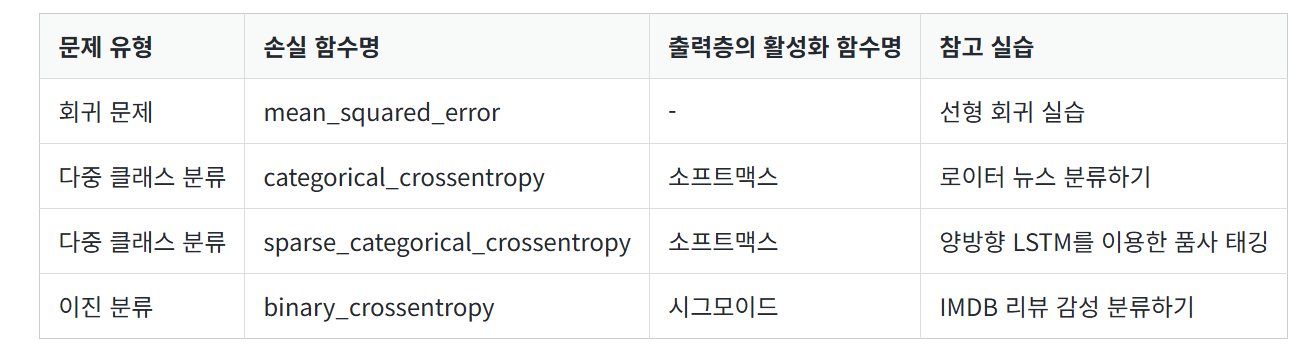

sparse_categorical_crossentropy는 categorical_crossentropy와 동일하게 다중 클래스 분류에서 사용하지만, 레이블을 원-핫 인코딩하지 않고 정수 인코딩 된 상태에서 수행 가능하다는 점이 다릅니다.

**fit()** : 모델을 학습합니다. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다. 그런 의미에서 fit()은 모델의 훈련을 시작합니다.

```python
    # 위의 compile() 코드의 연장선상인 코드
    model.fit(X_train, y_train, epochs=10, batch_size=32)
```

**첫번째 인자** = 훈련 데이터에 해당됩니다.  
**두번째 인자** = 지도 학습에서 레이블 데이터에 해당됩니다.  
**epochs** = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.  
**batch_size** = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.  
  
좀 더 많은 인자를 사용할 때를 보겠습니다.

```python
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
```

**validation_data(x_val, y_val)** = 검증 데이터(validation data)를 사용합니다. 일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

**validation_split** = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다. 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용합니다.

```python
    # 훈련 데이터의 20%를 검증 데이터로 사용.
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
```

**verbose** = 학습 중 출력되는 문구를 설정합니다.  
- 0 : 아무 것도 출력하지 않습니다.  
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.  
- 2 : 미니 배치마다 손실 정보를 출력합니다.  
  
아래는 verbose의 값이 1일 때와 2일 때를 보여줍니다.

```python
    # verbose = 1일 경우.
    Epoch 88/100
    7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
```

```python
    # verbose = 2일 경우.
    Epoch 88/100
    - 0s - loss: 0.1475 - acc: 1.0000
 ```

---
### **5. 평가(Evaluation)와 예측(Prediction)**
**evaluate()** : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

```python
    # 위의 fit() 코드의 연장선상인 코드
    model.evaluate(X_test, y_test, batch_size=32)
```

**첫번째 인자** = 테스트 데이터에 해당됩니다.  
**두번째 인자** = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.  
**batch_size** = 배치 크기.  
  
**predict()** : 임의의 입력에 대한 모델의 출력값을 확인합니다.  
  
```python
# 위의 fit() 코드의 연장선상인 코드
    model.predict(X_input, batch_size=32)
```

**첫번째 인자** = 예측하고자 하는 데이터.  
**batch_size** = 배치 크기.

---
### **6. 모델의 저장(Save)과 로드(Load)**
복습을 위한 스터디나 실제 어플리케이션 개발 단계에서 구현한 모델을 저장하고 불러오는 일은 중요합니다. 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미입니다.  
  
**save()** : 인공 신경망 모델을 hdf5 파일에 저장합니다.

```python
    model.save("model_name.h5")
```

**load_model()** : 저장해둔 모델을 불러옵니다.
```python
    from tensorflow.keras.models import load_model
    model = load_model("model_name.h5")
```